{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

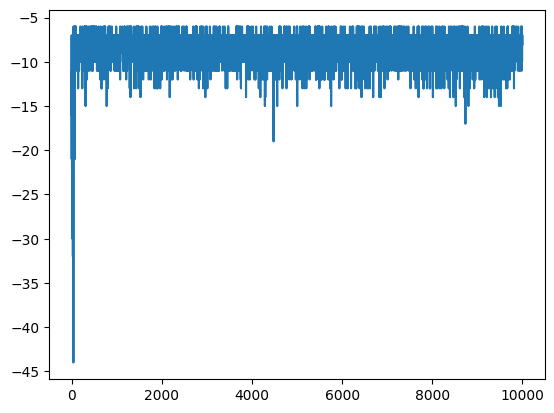

-----------------------------------------------
| -5.262 | -4.736 | -4.152 | -3.503 | -2.782 | 
-----------------------------------------------
| -5     | -4.152 | -3.503 | -5     | -1.98  | 
-----------------------------------------------
| -3.36  | -3.503 | -2.782 | -1.98  | -1.089 | 
-----------------------------------------------
| -3.251 | -5     | -1.98  | -1.089 | -0.099 | 
-----------------------------------------------
| -2.842 | -2.891 | -5     | -0.1   | 1      | 
-----------------------------------------------


In [1]:
# original code from https://github.com/ronanmmurphy/Q-Learning-Algorithm/blob/main/Q-Learning%20Algorithm.py
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 28 12:59:23 2020

Assignment 2 - Agents and Reinforcement Learning

@author: Ronan Murphy - 15397831
"""


import numpy as np
import random
import matplotlib.pyplot as plt



#set the rows and columns length
BOARD_ROWS = 5
BOARD_COLS = 5

#initalise start, win and lose states
START = (0, 0)
WIN_STATE = (4, 4)
HOLE_STATE = [(1,0),(3,1),(4,2),(1,3)]

#class state defines the board and decides reward, end and next position
class State:
    def __init__(self, state=START):
        #initalise the state to start and end to false
        self.state = state
        self.isEnd = False        

    def getReward(self):
        #give the rewards for each state -5 for loss, +1 for win, -1 for others
        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 1       
        
        else:
            return -1

    def isEndFunc(self):
        #set state to end if win/loss
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        #set the positions from current action - up, down, left, right
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        #check if next state is possible
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                    #if possible change to next state                
                    return nxtState 
        #Return current state if outside grid     
        return self.state 



        
#class agent to implement reinforcement learning through grid  
class Agent:

    def __init__(self):
        #inialise states and actions 
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        #set the learning and greedy values
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        # array to retain reward values for plot
        self.plot_reward = []
        
        #initalise Q values as a dictionary for current and new
        self.Q = {}
        self.new_Q = {}
        #initalise rewards to 0
        self.rewards = 0
        
        #initalise all Q values across the board to 0, print these values
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    #method to choose action with Epsilon greedy policy, and move to next state
    def Action(self):
        #random value vs epsilon
        rnd = random.random()
        #set arbitraty low value to compare with Q values to find max
        mx_nxt_reward =-10
        action = None
        
        #9/10 find max Q value over actions 
        if(rnd >self.epsilon) :
            #iterate through actions, find Q  value and choose best 
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        #else choose random action
        else:
            action = np.random.choice(self.actions)
        
        #select the next state based on action chosen
        position = self.State.nxtPosition(action)
        return position,action
    
    
    #Q-learning Algorithm
    def Q_Learning(self,episodes):
        x = 0
        #iterate through best path for each episode
        while(x < episodes):
            #check if state is end
            if self.isEnd:
                #get current rewrard and add to array for plot
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                #get state, assign reward to each Q_value in state
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                #reset state
                self.State = State()
                self.isEnd = self.State.isEnd
                
                #set rewards to zero and iterate to next episode
                self.rewards = 0
                x+=1
            else:
                #set to arbitrary low value to compare net state actions
                mx_nxt_value = -10
                #get current state, next state, action and current reward
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                #add reward to rewards for plot
                self.rewards +=reward
                
                #iterate through actions to find max Q value for action based on next state action
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    #find largest Q value
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                #next state is now current state, check if end state
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                #update Q values with max Q value for next state
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
            #copy new Q values to Q table
            self.Q = self.new_Q.copy()
        #print final Q table output
        print(self.Q)
        
    #plot the reward vs episodes
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":
    #create agent for 10,000 episdoes implementing a Q-learning algorithm plot and show values.
    ag = Agent()
    episodes = 10000
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()

I also ask for some explanation for this code analysis:

> # 🧠 What is this Q-Learning source code doing?
>
> **Overall goal:**  
> Train an **agent** to navigate a 5x5 FrozenLake grid using **Q-Learning** to reach the **WIN_STATE** while avoiding the **HOLE_STATE** (holes).
>
> ---
>
> # ✨ Detailed Explanation by Module
>
> | Module | Description |
> |:---|:---|
> | `State` class | Manages the agent's current position (`self.state`), checks if the game is over (`self.isEnd`), returns rewards (`getReward`), and computes next position based on actions (`nxtPosition`). |
> | `Agent` class | Implements Q-Learning: initializes the Q-table, chooses actions (epsilon-greedy), updates Q-values, records rewards, and plots learning progress. |
>
> ---
>
> ## 1. `State` class details
> - **Initialization** ➔ Starts at `(0,0)`.
> - **`getReward()`**:
>   - If agent falls into a HOLE → reward = **-5**
>   - If agent reaches WIN → reward = **+1**
>   - Otherwise (normal move) → reward = **-1**
> - **`isEndFunc()`**:
>   - Sets `isEnd = True` if the agent reaches the WIN or a HOLE.
> - **`nxtPosition(action)`**:
>   - Computes the next position based on the action (up, down, left, right).
>   - If the next position is out of bounds, stay at the current position.
>
> ---
>
> ## 2. `Agent` class details
> - **Actions defined**: 0 = up, 1 = down, 2 = left, 3 = right.
> - **Parameters**:
>   - `alpha = 0.5` ➔ Learning rate
>   - `gamma = 0.9` ➔ Discount factor
>   - `epsilon = 0.1` ➔ 10% chance to explore randomly
> - **Q-table structure**:
>   - `self.Q[(i, j, k)]`
>     - (i, j) = board position
>     - k = action
>     - Each position and action has a separate Q-value.
> - **new_Q table**:
>   - A temporary table for updating values safely before copying back to `self.Q`.
>
> ---
>
> ## 3. Core Methods
>
> ### ➔ `Action()`
> - **Epsilon-greedy strategy**:
>   - 90% of the time choose the best known action (highest Q-value).
>   - 10% of the time pick a random action.
>
> ### ➔ `Q_Learning(episodes)`
> Main training loop — **one episode means navigating from start until reaching WIN or HOLE**.
>
> Main logic:
>
> 1. **If the state is terminal** (WIN or HOLE):
>    - Assign the terminal reward directly to all Q-values at the current state.
>    - Reset to start a new episode.
> 2. **If not terminal**:
>    - Choose an action with epsilon-greedy.
>    - Get the reward for the current state.
>    - Look ahead: find the maximum Q-value at the next state.
>    - Update the Q-value using the Q-Learning update rule:
>
>    ```
>    Q(s,a) ← (1-α) × Q(s,a) + α × (r + γ × max_a Q(s',a))
>    ```
>    - Move to the next state.
> 3. **At the end of every step**, copy `new_Q` back into `self.Q`.
>
> ### ➔ `plot(episodes)`
> - Plot cumulative rewards vs. number of episodes.
>
> ### ➔ `showValues()`
> - Print the maximum Q-value for each board position after training to visualize the learned policy.
>
> ---
>
> # 🔥 Key Points
>
> | Key Concept | Explanation |
> |:---|:---|
> | Q-table uses a dictionary | `(row, col, action)` as key |
> | new_Q is used for safe updating | To avoid corrupting current Q during training |
> | ε-greedy action selection | 90% exploit, 10% random exploration |
> | Rewards are designed carefully | +1 for reaching goal, -5 for falling into a hole, -1 for normal moves |
> | Clear episode ending condition | Episode ends when reaching WIN or HOLE |
> | Full Q-table copy every episode | (This could be optimized later) |
>
> ---
>
> # 🎯 Why is this code a little confusing?
>
> You're right — it feels a bit messy because:
> - The code uses **dictionaries** instead of clean matrices (harder to visualize).
> - **new_Q** and **Q** copying back and forth makes tracking updates tricky.
> - **Action selection and reward calculation** are bundled together, not modularized.
> - **No function decomposition** — everything happens inside one big method (`Q_Learning()`).
>
> ---
>
> # 🧹 Visualizing it as a Simple Flowchart
>
> ```
> Start (state = (0,0))
>
> ↓
> Choose action (epsilon-greedy)
>
> ↓
> Move to new state (nxtPosition)
>
> ↓
> Get reward based on new position
>
> ↓
> Update Q-table (Q-Learning formula)
>
> ↓
> If reached WIN or HOLE?
>  ↙              ↘
> Yes             No
> ↓                ↓
> Reset episode   Keep moving
> ```
>
> ---
>
> # ✨ Pro Tips
>
> If you want to **trace and debug** how the agent is learning, you can add simple `print()` statements, for example:
>
> ```python
> print(f"State: {self.State.state}, Action: {action}, Reward: {reward}")
> ```
>
> This way you can watch how the agent moves and updates values during training.
>
> ---
>
> # ✅ Full Summary
>
> **This code trains an agent using Q-Learning to move across a 5x5 FrozenLake grid, aiming to reach the WIN state while avoiding holes, learning an optimal path through trial and error.**


In each episode, the agent takes multiple steps. After each move to a new position, it updates the Q-table based on the received reward. This updated Q-table serves as feedback, gradually guiding the agent to learn better paths through the environment using the Q-learning algorithm.

Part 1: Identify the comparable logic
Let’s isolate the most important Q-learning update rule from your Python code:

q_value = (1 - alpha) * Q[(i,j,action)] + alpha * (reward + gamma * Q[(next_i, next_j, a)])
Your Verilog code implements this using fixed-point math. So, the goal is to test:

For a given (s, a, s', r) input tuple,

The Verilog and Python modules should produce the same (or very close) new Q(s,a).

Create a Python script that exports Q-update test vectors to a file for Verilog testbench.

In [1]:
import numpy as np
import csv

# fixed test input
alpha = 0.5
gamma = 0.9

# test data
test_cases = [
    # curr_row, curr_col, curr_action, next_row, next_col, reward, Q(s,a), max_a(Q(s'))
    (1, 1, 2, 2, 2, -1, 0.5, 0.9),
    (0, 0, 1, 0, 1, -1, 0.2, 0.4),
    (2, 3, 3, 4, 4, 1, 0.0, 1.0),
    (4, 2, 0, 4, 3, -5, 0.8, 0.3),
]

with open("test_vectors.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["s_row", "s_col", "action", "next_row", "next_col", "reward", "Q_sa", "Q_max_next"])
    for case in test_cases:
        writer.writerow(case)


Create a Verilog testbench (tb_q_update_unit.sv) that:
Reads values from a file;
Applies them to the DUT (your q_update_unit);
Captures output Q′;
Logs results for comparison;

In [ ]:
module tb_q_update_unit;

    // Parameters
    parameter Q_WIDTH = 16;

    // DUT inputs
    logic clk = 0, rst = 0, start = 0;
    logic [2:0] curr_row, curr_col, next_row, next_col;
    logic [1:0] curr_action;
    logic signed [Q_WIDTH-1:0] reward;

    // DUT output
    logic done;

    // Instantiate DUT
    q_update_unit dut (
        .clk(clk), .rst(rst), .start(start),
        .curr_row(curr_row), .curr_col(curr_col),
        .curr_action(curr_action), .reward(reward),
        .next_row(next_row), .next_col(next_col),
        .done(done)
    );

    // Clock
    always #5 clk = ~clk;

    initial begin
        $display("Starting Verilog test...");

        // Read from test_vectors.csv converted to .mem or .hex if needed
        // OR hardcode a few vectors here for testing

        // Example test
        rst = 1; #10; rst = 0;
        curr_row = 3;
        curr_col = 2;
        curr_action = 1;
        next_row = 3;
        next_col = 3;
        reward = -16'd1;  // Fixed-point representation

        start = 1; #10; start = 0;

        wait (done == 1);
        $display("Test completed");
        $finish;
    end
endmodule
